## Principal Component Analysis

It is a statistical technique used to analyze and reduce the dimensionality of a dataset while retaining the most important information.

### Approach 
- Calculate Covariance
- Calculate Eigenvectors and Eigenvalues of Cov Matrix
- Sort Eigenvectors according to their Eigenvalues in decreasing order
- For K dimension choose first K EigenVectors
- Transform the data points into k dimension (Dot Prodcut)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### From Scratch

In [2]:
def Principal_Component_Analysis(x,dim=1):
    
    # Step 1 - Calculate Cov
    x = x - np.mean(x,axis=0)
    matrix = np.cov(x.T)
    
    # Step 2 - Calculate Eigenvectors and Eigenvalues of Cov Matrix
    eig_val, eig_vec = np.linalg.eig(matrix)
    
    # Step 3 - Sort Eigenvectors according to their Eigenvalues in decreasing order
    sorted_index = np.argsort(eig_val)[::-1]
    eig_val = eig_val[sorted_index]
    eig_vec = eig_vec[:,sorted_index]
    
    # Step 4 - Choose first K EigenVectors
    k_matrix = eig_vec[:,0:dim]
    
    # Step 5 - Transform the data points into k dimension
    ans = np.dot(x,k_matrix)
    
    return ans

In [3]:
n = int(input("Enter No of Samples : "))
arr = [input("Enter {} Samples : ".format(i+1)) for i in range(n)]
arr = [list(map(int,arr[i].split())) for i in range(n)]
x = np.array(arr)

Enter No of Samples : 4
Enter 1 Samples : 4 11
Enter 2 Samples : 8 4
Enter 3 Samples : 13 5
Enter 4 Samples : 7 14


In [4]:
k = int(input("Enter Dimension : "))
print(Principal_Component_Analysis(x,k))

Enter Dimension : 1
[[-4.30518692]
 [ 3.73612869]
 [ 5.69282771]
 [-5.12376947]]


### Sklearn Implementation

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=k)
print(pca.fit_transform(x))

[[-4.30518692]
 [ 3.73612869]
 [ 5.69282771]
 [-5.12376947]]


## Iris Dataset

In [6]:
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

In [7]:
reduced = Principal_Component_Analysis(x,2)
print(reduced[:10])

[[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]
 [-2.74534286  0.31829898]
 [-2.72871654 -0.32675451]
 [-2.28085963 -0.74133045]
 [-2.82053775  0.08946138]
 [-2.62614497 -0.16338496]
 [-2.88638273  0.57831175]
 [-2.6727558   0.11377425]]


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
print(pca.fit_transform(x)[:10])

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]


In [9]:
target = pd.DataFrame(y,columns = ["Target"])
df = pd.DataFrame(reduced, columns = ["PCA1","PCA2"])
df = pd.concat([df,target],axis = 1)

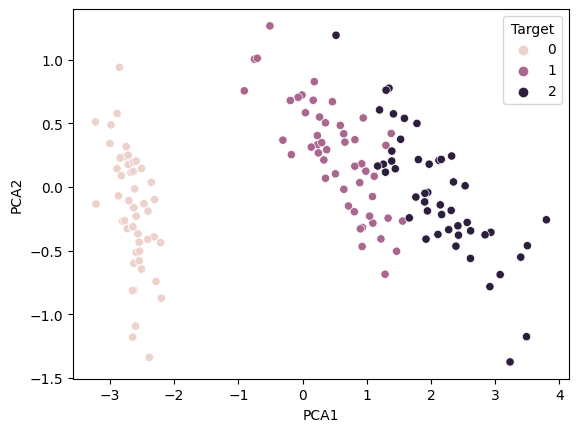

In [10]:
import seaborn as sns

sns.scatterplot(df, x="PCA1", y="PCA2", hue="Target")
plt.show()

### Explained Variance Plot

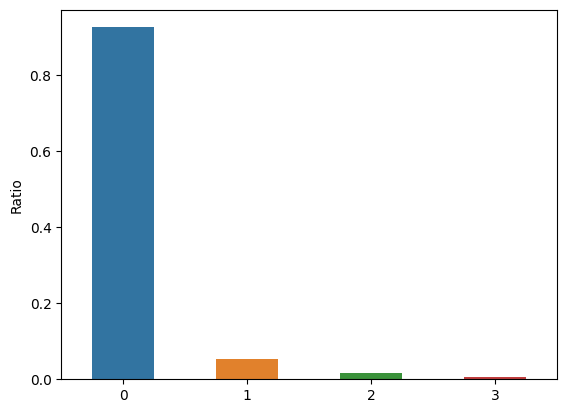

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x)

value = pd.DataFrame(pca.explained_variance_ratio_,columns = ["Ratio"])
sns.barplot(value, x=value.index, y="Ratio", width=0.5)
plt.show()

In [12]:
for i,j in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    print(i+1,str(j*100)+" %")

1 92.46187232017272 %
2 97.76852063187948 %
3 99.47878161267246 %
4 100.0 %
